<a href="https://colab.research.google.com/github/sakalaharshith/Comparison_of_MLmodel_DLmodel_digits_classification/blob/main/VIP_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries
from keras.datasets import mnist
from sklearn.svm import SVC  
from google.colab.patches import cv2_imshow
import numpy as np
import struct as st
import cv2 as cv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,balanced_accuracy_score

In [ ]:
# Importing mnist Dataset
with open('train-images.idx3-ubyte','rb') as f:
    magic, train_size = st.unpack(">II", f.read(8))
    nrows, ncols = st.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    train_X = data.reshape((train_size, nrows, ncols))

with open('train-labels.idx1-ubyte','rb') as o:
    magic, size = st.unpack(">II", o.read(8))
    train_y = np.fromfile(o, dtype=np.dtype(np.uint8).newbyteorder('>'))

In [ ]:
# Importing Mnist Dataset
with open('t10k-images.idx3-ubyte','rb') as f:
    magic, train_size = st.unpack(">II", f.read(8))
    nrows, ncols = st.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    test_X = data.reshape((train_size, nrows, ncols))

with open('t10k-labels.idx1-ubyte','rb') as o:
    magic, size = st.unpack(">II", o.read(8))
    test_y = np.fromfile(o, dtype=np.dtype(np.uint8).newbyteorder('>'))

In [ ]:
#Hog Feature Extraction
SZ = 20
bin_n = 16 
def hog(img):
    gx = cv.Sobel(img, cv.CV_32F, 1, 0)
    gy = cv.Sobel(img, cv.CV_32F, 0, 1)
    mag, ang = cv.cartToPolar(gx, gy)
    bins = np.int32(bin_n*ang/(2*np.pi))    # quantizing binvalues in (0...16)
    bin_cells = bins[:10,:10], bins[10:,:10], bins[:10,10:], bins[10:,10:]
    mag_cells = mag[:10,:10], mag[10:,:10], mag[:10,10:], mag[10:,10:]
    hists = [np.bincount(b.ravel(), m.ravel(), bin_n) for b, m in zip(bin_cells, mag_cells)]
    hist = np.hstack(hists)     # hist is a 64 bit vector
    return hist

In [ ]:
# Data Normalization
def image_normalisation(train_x,test_x):
   
  train_x=train_x.astype('float32')
  test_x=test_x.astype('float32')
  train_normalised_x=train_x/255.0
  test_normalised_x=test_x/255.0
  print(type(test_normalised_x))
  
  return [train_normalised_x,test_normalised_x]

  

In [ ]:
# Applying hog feature extraction on training dataset
hogdata=[list(hog(x)) for x in train_X]
trainData =np.float32(hogdata).reshape(-1,64)



In [ ]:
# Applying hog feature extraction on test dataset
hogdata=[list(hog(x)) for x in test_X]
testData = np.float32(hogdata).reshape(-1,64)



In [ ]:
print("shape of each image after hog applied",trainData[0].shape)

shape of each image after hog applied (64,)


In [ ]:
# Model training on mnist
model_mnist = RandomForestClassifier()
model_mnist.fit(trainData, train_y)
predict=model_mnist.predict(testData)
accuracy=round(sum(predict==test_y)/len(test_y),3)
kfold = KFold(n_splits=10, random_state=1, shuffle=True)
cross_validation_score=cross_val_score(model_mnist,trainData,train_y,scoring='accuracy',cv=kfold)


In [ ]:
print(" trained and tested on mnist accuracy ",accuracy)
print("cross validation accuracy ",cross_validation_score)

 trained and tested on mnist accuracy  0.935
cross validation accuracy  [0.92966667 0.93233333 0.928      0.929      0.93416667 0.9325
 0.9325     0.93316667 0.92866667 0.93483333]


In [ ]:

print(classification_report(test_y, predict))
print("balanced accuracy",balanced_accuracy_score(test_y,predict))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       980
           1       0.99      0.98      0.99      1135
           2       0.91      0.92      0.92      1032
           3       0.92      0.94      0.93      1010
           4       0.94      0.97      0.95       982
           5       0.93      0.93      0.93       892
           6       0.94      0.93      0.94       958
           7       0.96      0.93      0.94      1028
           8       0.88      0.87      0.87       974
           9       0.93      0.92      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.94      0.94      0.94     10000

balanced accuracy 0.9344074063919333


In [ ]:
# Zip Extracting Synthetic Data
from zipfile import ZipFile
file_name = 'SyntheticDigits.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')
# Note : Sometimes after extracting folder the following cells may not work properly or throws error. If something of this sort happens then it is better to restart the environment and then it works fine

Done


In [ ]:
# hog feature Extraction on Synthetic Data
file_list=[0,1,2,3,4,5,6,7,8,9]
import os
for x in range(0,10):
  folder=str(x)
  file_list[x]=os.listdir(folder)
count=0
synthetic_trainingdata=[]
synthetic_labels=[]
synthetic_trainingdata_cnn=[]
for x in range(0,10):
  for a in range(0,1000):
    path=""+str(x)+"/"+file_list[x][a]
    synthetic_trainingdata_cnn.append(cv.imread(path,cv.IMREAD_UNCHANGED))
    data=hog(cv.imread(path,cv.IMREAD_UNCHANGED))
    synthetic_trainingdata.append(data)
    
for x in range(0,10):
  list_data=[x for a in range(0,1000)]
  synthetic_labels.extend(list_data)
array=np.array(synthetic_labels)
synthetic_dataarray=np.array(synthetic_trainingdata).reshape(-1,64)

In [ ]:
# Data Split of Synthetic Data
x_train,x_test,y_train,y_test=train_test_split(synthetic_dataarray,array,test_size=0.2)
x_train_cnn,x_test_cnn,y_train_cnn,y_test_cnn=train_test_split(synthetic_trainingdata_cnn,array,test_size=0.2)

In [ ]:
# Model Training on Synthetic Data
model_synthetic=RandomForestClassifier()
model_synthetic.fit(x_train, y_train)
predict_synthetic=model_synthetic.predict(x_test)
accuracy_synthetic=round(sum(predict_synthetic==y_test)/len(y_test),3)
kfold = KFold(n_splits=10, random_state=1, shuffle=True)
cross_validation_score=cross_val_score(model_synthetic,x_train,y_train,scoring='accuracy',cv=kfold)
print("accuracy for trained and tested on synthetic",accuracy_synthetic*100)
print("cross validation score",cross_validation_score)

accuracy for trained and tested on synthetic 97.3
cross validation score [0.97625 0.97    0.96625 0.96125 0.96125 0.965   0.96875 0.97125 0.96875
 0.96625]


In [ ]:

print(classification_report(y_test, predict_synthetic))
print("balanced accuracy",balanced_accuracy_score(y_test,predict_synthetic))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       189
           1       0.99      0.96      0.98       198
           2       0.96      0.97      0.97       191
           3       0.96      0.97      0.96       185
           4       0.96      0.99      0.98       188
           5       0.97      0.98      0.97       212
           6       0.97      0.99      0.98       226
           7       0.97      0.99      0.98       193
           8       1.00      0.97      0.98       201
           9       0.97      0.94      0.96       217

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000

balanced accuracy 0.9730619466683417


In [ ]:
# Predicting Synthetic Data using mnist trained model
predict=model_mnist.predict(x_test)
accuracy=round(sum(predict==y_test)/len(y_test),3)
print("accuracy for trained on mnist and tested on sythetic",accuracy*100)


accuracy for trained on mnist and tested on sythetic 48.5


In [ ]:
print(classification_report(y_test, predict))
print("balanced accuracy",balanced_accuracy_score(y_test,predict))

              precision    recall  f1-score   support

           0       0.63      0.42      0.51       189
           1       0.77      0.55      0.64       198
           2       0.38      0.42      0.40       191
           3       0.56      0.43      0.48       185
           4       0.53      0.52      0.52       188
           5       0.33      0.70      0.45       212
           6       0.69      0.30      0.42       226
           7       0.57      0.65      0.61       193
           8       0.54      0.50      0.52       201
           9       0.33      0.39      0.36       217

    accuracy                           0.48      2000
   macro avg       0.53      0.49      0.49      2000
weighted avg       0.53      0.48      0.49      2000

balanced accuracy 0.4866818503574142


In [ ]:
# Predicting mnist data using Synthetic Data trained model
predict=model_synthetic.predict(testData)
accuracy=round(sum(predict==test_y)/len(test_y),3)
print("accuracy for trained on synthetic and tested on mnist",accuracy*100)


accuracy for trained on synthetic and tested on mnist 75.5


In [ ]:
print(classification_report(test_y, predict))
print("balanced accuracy",balanced_accuracy_score(test_y,predict))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       980
           1       0.93      0.96      0.94      1135
           2       0.75      0.54      0.63      1032
           3       0.67      0.84      0.75      1010
           4       0.78      0.89      0.83       982
           5       0.78      0.84      0.81       892
           6       0.81      0.81      0.81       958
           7       0.97      0.72      0.83      1028
           8       0.53      0.66      0.59       974
           9       0.69      0.50      0.58      1009

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.77      0.75      0.75     10000

balanced accuracy 0.7541877072523395


In [ ]:
# Importing libraries for Deep Learning
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
# CNN
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 5*5*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [ ]:
# Data Normalization on Mnist and synthetic
normalised_data_mnist=image_normalisation(train_X,test_X)
train_x_mnist=normalised_data_mnist[0]
test_x_mnist=normalised_data_mnist[1]
normalised_data_synthetic=image_normalisation(np.array(x_train_cnn),np.array(x_test_cnn))
#print(len(x_train_cnn))
train_x_synthetic=normalised_data_synthetic[0]
test_x_synthetic=normalised_data_synthetic[1]


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# Training and testing methods of CNN

epochs = 15
train_losses = []
test_losses = []
train_correct = []
test_correct_validation = []
def cnn_training(train_loader,train_y_loader,test_loader1,test_y_loader1,model):
  
  for i in range(epochs):
      trn_corr = 0
      
      b=0
    # Run the training batches
      for (X_train,y_train) in zip(train_loader,train_y_loader):
        b+=1
        
        y_pred = model(X_train.view(10,1,28,28))  # we don't flatten X-train here
        loss = criterion(y_pred,y_train.flatten())
 
        
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%400 == 0:
            print("value b",b)
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
        
      train_losses.append(loss.item())
      train_correct.append(trn_corr.item())
      with torch.no_grad():
        tst_corr=0
        for (X_test, y_test) in zip(test_loader1,test_y_loader1):

            
            y_val = model(X_test.view(10,1,28,28))

            
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
      loss = criterion(y_val, y_test.flatten())
      test_losses.append(loss)
      test_correct_validation.append(tst_corr.item())

        
def cnn_testing(test_loader1,test_y_loader1,model):
  tst_corr = 0
  for (X_test, y_test) in zip(test_loader1,test_y_loader1):
     
      y_val = model(X_test.view(10,1,28,28))
      predicted = torch.max(y_val.data, 1)[1] 
      tst_corr += (predicted == y_test).sum()
  loss = criterion(y_val, y_test.flatten())
  #test_losses.append(loss.item())
  #test_correct.append(tst_corr.item()*100/(100*b))
  return tst_corr
      

In [ ]:
#MNIST DATA
tensor_trainData=torch.tensor(train_x_mnist.astype(np.float32))
tensor_testData=torch.tensor(test_x_mnist.astype(np.float32))
tensor_train_y=torch.tensor(train_y)
tensor_test_y=torch.tensor(test_y)
train_loader = DataLoader(tensor_trainData, batch_size=10)
test_loader = DataLoader(tensor_testData, batch_size=10)
train_y_loader=DataLoader(tensor_train_y,batch_size=10)
test_y_loader=DataLoader(tensor_test_y,batch_size=10)
#SYNTHETIC DATA
tensor_trainData_synthetic=torch.tensor(np.array(train_x_synthetic).astype(np.float32))

tensor_testData_synthetic=torch.tensor(np.array(test_x_synthetic).astype(np.float32))
tensor_train_y_synthetic=torch.tensor(y_train_cnn)
tensor_test_y_synthetic=torch.tensor(y_test_cnn)
train_loader_synthetic = DataLoader(tensor_trainData_synthetic, batch_size=10)

test_loader_synthetic= DataLoader(tensor_testData_synthetic, batch_size=10)
train_y_loader_synthetic=DataLoader(tensor_train_y_synthetic,batch_size=10)
test_y_loader_synthetic=DataLoader(tensor_test_y_synthetic,batch_size=10)

In [ ]:
# Training and testing CNN on mnist and testing on synthetic data 
cnn_model_mnist = ConvolutionalNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cnn_model_mnist.parameters(), lr = 0.001)
cnn_training(train_loader,train_y_loader,test_loader,test_y_loader,cnn_model_mnist)
#cnn_testing(test_loader,test_y_loader,cnn_model_mnist)
print("synthetic_accuracy",100*(cnn_testing(test_loader_synthetic,test_y_loader_synthetic,cnn_model_mnist)/2000))


value b 400
epoch:  0  batch:  400 [  4000]  loss: 2.24322057  accuracy:  10.125%
value b 800
epoch:  0  batch:  800 [  8000]  loss: 2.27392006  accuracy:   9.975%
value b 1200
epoch:  0  batch: 1200 [ 12000]  loss: 2.28430152  accuracy:  10.067%
value b 1600
epoch:  0  batch: 1600 [ 16000]  loss: 2.30317879  accuracy:   9.938%
value b 2000
epoch:  0  batch: 2000 [ 20000]  loss: 2.30116129  accuracy:  10.265%
value b 2400
epoch:  0  batch: 2400 [ 24000]  loss: 2.30807233  accuracy:  11.979%
value b 2800
epoch:  0  batch: 2800 [ 28000]  loss: 2.31506228  accuracy:  13.171%
value b 3200
epoch:  0  batch: 3200 [ 32000]  loss: 2.28809762  accuracy:  13.400%
value b 3600
epoch:  0  batch: 3600 [ 36000]  loss: 2.29206562  accuracy:  13.208%
value b 4000
epoch:  0  batch: 4000 [ 40000]  loss: 2.31539750  accuracy:  13.037%
value b 4400
epoch:  0  batch: 4400 [ 44000]  loss: 2.28923607  accuracy:  12.898%
value b 4800
epoch:  0  batch: 4800 [ 48000]  loss: 2.28501344  accuracy:  12.754%
value 

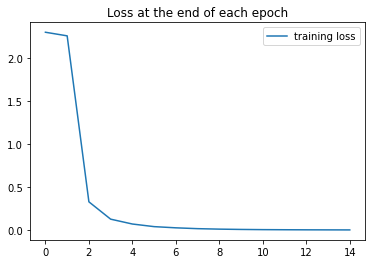

In [ ]:
# Training loss for mnist trained CNN
plt.plot(train_losses, label='training loss')
plt.title('Loss at the end of each epoch')
plt.legend()
train_losses.clear()# clearing memory for using another cnn object


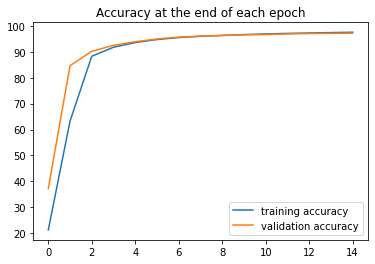

In [ ]:
# Accuracy and validation accuracy for mnist trained cnn model
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct_validation], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

In [ ]:
print(test_correct_validation[9])

9656


In [ ]:
# Training and testing CNN on synthetic and testing on mnist data 
cnn_model_synthetic = ConvolutionalNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cnn_model_synthetic.parameters(), lr = 0.01)
cnn_training(train_loader_synthetic,train_y_loader_synthetic,test_loader_synthetic,test_y_loader_synthetic,cnn_model_synthetic)
#print("synthetic_dataset_accuracy",cnn_testing(test_loader_synthetic,test_y_loader_synthetic,cnn_model_synthetic))
print("mnist_dataset_accuracy",100*(cnn_testing(test_loader,test_y_loader,cnn_model_synthetic)/10000))



value b 400
epoch:  0  batch:  400 [  4000]  loss: 2.31107116  accuracy:   9.775%
value b 800
epoch:  0  batch:  800 [  8000]  loss: 2.29853845  accuracy:  11.725%
value b 400
epoch:  1  batch:  400 [  4000]  loss: 2.29958916  accuracy:  19.900%
value b 800
epoch:  1  batch:  800 [  8000]  loss: 2.02325344  accuracy:  24.900%
value b 400
epoch:  2  batch:  400 [  4000]  loss: 1.99535143  accuracy:  39.150%
value b 800
epoch:  2  batch:  800 [  8000]  loss: 1.35073900  accuracy:  45.250%
value b 400
epoch:  3  batch:  400 [  4000]  loss: 1.28193319  accuracy:  59.700%
value b 800
epoch:  3  batch:  800 [  8000]  loss: 0.92883170  accuracy:  63.925%
value b 400
epoch:  4  batch:  400 [  4000]  loss: 0.81981885  accuracy:  75.275%
value b 800
epoch:  4  batch:  800 [  8000]  loss: 0.49483734  accuracy:  78.588%
value b 400
epoch:  5  batch:  400 [  4000]  loss: 0.47600609  accuracy:  87.000%
value b 800
epoch:  5  batch:  800 [  8000]  loss: 0.24253687  accuracy:  88.787%
value b 400
epoc

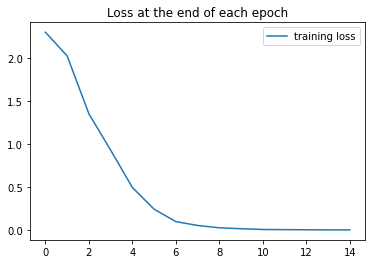

In [ ]:
# Training loss for Sythetic Trained CNN model
plt.plot(train_losses, label='training loss')
plt.title('Loss at the end of each epoch')
plt.legend()


In [ ]:
len(train_losses)

45

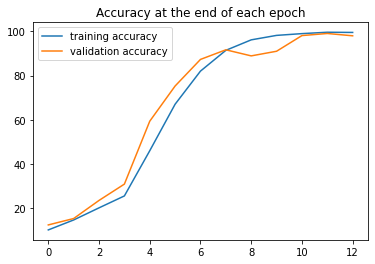

In [ ]:
# Accuracy and validation accuracy for Synthetic trained CNN
plt.plot([t/80 for t in train_correct], label='training accuracy')
plt.plot([t/20 for t in test_correct_validation], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

tensor(9790)
